In [1]:
import pickle
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pickle
from gplearn.genetic import SymbolicClassifier
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from io import StringIO
from IPython.display import Image
import pandas as pd

In [2]:
HWG = pd.DataFrame(pd.read_csv('TrainTest-description_b.csv'))
HWG0 = HWG.iloc[:,9:-4]
HWG0


HWG1 = HWG.iloc[:,-1]
HWG1

HWG = pd.concat([HWG0,HWG1], axis=1)
HWG.to_csv('0_HWG.csv')
HWG

,A1 NumberofProtons,A2 NumberofProtons,B NumberofProtons,X1 NumberofProtons,X2 NumberofProtons,X3 NumberofProtons,X4 NumberofProtons,Ion NumberofProtons,A1 NumberofNeutrons,A2 NumberofNeutrons,...,Ion AtomicMass,A1 Melting Point,A2 Melting Point,B Melting Point,X1 Melting Point,X2 Melting Point,X3 Melting Point,X4 Melting Point,Ion Melting Point,Adsorption energy(ev)
0,3,3,32,9,9,9,9,3,4,4,...,6.941,453.85,453.85,1211.45,53.63,53.63,53.63,53.63,453.85,-7.004905
1,3,3,32,9,9,9,9,30,4,4,...,65.380,453.85,453.85,1211.45,53.63,53.63,53.63,53.63,692.88,0.395232
2,3,3,32,9,9,9,9,19,4,4,...,39.098,453.85,453.85,1211.45,53.63,53.63,53.63,53.63,336.50,-6.580689
3,3,3,32,9,9,9,9,11,4,4,...,22.990,453.85,453.85,1211.45,53.63,53.63,53.63,53.63,371.15,-5.557395
4,3,3,32,9,9,9,9,13,4,4,...,26.982,453.85,453.85,1211.45,53.63,53.63,53.63,53.63,933.40,2.608437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,37,37,50,18,18,53,53,11,48,48,...,22.990,312.79,312.79,505.21,266.05,266.05,386.65,386.65,371.15,-1.934356
636,37,37,50,18,18,53,53,13,48,48,...,26.982,312.79,312.79,505.21,266.05,266.05,386.65,386.65,933.40,-0.151069
637,37,37,50,18,18,53,53,20,48,48,...,40.078,312.79,312.79,505.21,266.05,266.05,386.65,386.65,1112.15,-4.757395
638,37,37,50,18,18,53,53,12,48,48,...,24.305,312.79,312.79,505.21,266.05,266.05,386.65,386.65,923.15,-0.462000


In [3]:
formula=pd.DataFrame(pd.read_csv('data_rfe_formula_perovskite.csv'))
formula

,Name
0,Li2GeF4
1,Li2GeF4
2,Li2GeF4
3,Li2GeF4
4,Li2GeF4
...,...
635,Rb2SnCl2I2
636,Rb2SnCl2I2
637,Rb2SnCl2I2
638,Rb2SnCl2I2


In [4]:
import matminer
from matminer.featurizers.conversions import StrToComposition
from matminer.featurizers.composition import ElementProperty
import pandas as pd

str_to_comp = StrToComposition(target_col_id='composition')
df_comp = str_to_comp.featurize_dataframe(formula, col_id='Name')

from matminer.featurizers.composition.orbital import AtomicOrbitals
comp_to_Orbital = AtomicOrbitals()
AtomicOrbitals = comp_to_Orbital.featurize_dataframe(df_comp,col_id='composition')
AtomicOrbitals = AtomicOrbitals.iloc[:,[4,7,8]]   # data.iloc[ : , [1,2,3] ]  取所有行和第1,2,3列交叉的所有的数据
AtomicOrbitals.to_csv('1_AtomicOrbitals.csv')
AtomicOrbitals

StrToComposition:   0%|          | 0/640 [00:00<?, ?it/s]

AtomicOrbitals:   0%|          | 0/640 [00:00<?, ?it/s]

,HOMO_energy,LUMO_energy,gap_AO
0,-0.415606,-0.149882,0.265724
1,-0.415606,-0.149882,0.265724
2,-0.415606,-0.149882,0.265724
3,-0.415606,-0.149882,0.265724
4,-0.415606,-0.149882,0.265724
...,...,...,...
635,-0.267904,-0.144450,0.123454
636,-0.267904,-0.144450,0.123454
637,-0.267904,-0.144450,0.123454
638,-0.267904,-0.144450,0.123454


In [5]:
import logging
import gensim
from gensim.models import word2vec, KeyedVectors
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
# from chemdataextractor import Document
# import pkuseg
import numpy as np
from nltk.tokenize import MWETokenizer
import itertools
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from sklearn.manifold import TSNE


ele= r'Element_split.csv'
ele=pd.DataFrame(pd.read_csv(ele))
ele


model = KeyedVectors.load_word2vec_format('model.txt')




def cos(x):
    return model.similarity(x, 'battery')
# 对DataFrame中的每个元素应用这个函数
battery = ele.applymap(cos)
battery = battery.add_prefix('battery_')
# 打印处理后的DataFrame
battery.to_csv('battery.csv')
battery


def cos(x):
    return model.similarity(x, 'stable')
# 对DataFrame中的每个元素应用这个函数
stable = ele.applymap(cos)
stable = stable.add_prefix('stable_')
# 打印处理后的DataFrame
stable.to_csv('stable.csv')
stable

def cos(x):
    return model.similarity(x, 'unstable')
# 对DataFrame中的每个元素应用这个函数
unstable = ele.applymap(cos)
unstable = unstable.add_prefix('unstable_')
# 打印处理后的DataFrame
unstable.to_csv('unstable.csv')
unstable

def cos(x):
    return model.similarity(x, 'solar')
# 对DataFrame中的每个元素应用这个函数
solar = ele.applymap(cos)
solar = solar.add_prefix('solar_')
# 打印处理后的DataFrame
solar.to_csv('solar.csv')
solar

def cos(x):
    return model.similarity(x, 'photo')
# 对DataFrame中的每个元素应用这个函数
photo = ele.applymap(cos)
photo = photo.add_prefix('photo_')
# 打印处理后的DataFrame
photo.to_csv('photo.csv')
photo

def cos(x):
    return model.similarity(x, 'rechargeable')
# 对DataFrame中的每个元素应用这个函数
rechargeable = ele.applymap(cos)
rechargeable = rechargeable.add_prefix('rechargeable_')
# 打印处理后的DataFrame
rechargeable.to_csv('rechargeable.csv')
rechargeable

def cos(x):
    return model.similarity(x, 'adsorption')
# 对DataFrame中的每个元素应用这个函数
adsorption = ele.applymap(cos)
adsorption = adsorption.add_prefix('adsorption_')
# 打印处理后的DataFrame
adsorption.to_csv('adsorption.csv')
adsorption

def cos(x):
    return model.similarity(x, 'diffusion')
# 对DataFrame中的每个元素应用这个函数
diffusion = ele.applymap(cos)
diffusion = diffusion.add_prefix('diffusion_')
# 打印处理后的DataFrame
diffusion.to_csv('diffusion.csv')
diffusion

def cos(x):
    return model.similarity(x, 'intercalation')
# 对DataFrame中的每个元素应用这个函数
intercalation = ele.applymap(cos)
intercalation = intercalation.add_prefix('intercalation_')
# 打印处理后的DataFrame
intercalation.to_csv('intercalation.csv')
intercalation

NLP = pd.concat([battery, stable, unstable, solar, photo,rechargeable, adsorption, diffusion, intercalation], axis=1)
NLP.to_csv('2_NLP.csv')
NLP

,battery_A1,battery_A2,battery_B,battery_X1,battery_X2,battery_X3,battery_X4,stable_A1,stable_A2,stable_B,...,diffusion_X2,diffusion_X3,diffusion_X4,intercalation_A1,intercalation_A2,intercalation_B,intercalation_X1,intercalation_X2,intercalation_X3,intercalation_X4
0,0.566983,0.566983,0.224103,0.307130,0.307130,0.30713,0.30713,0.366833,0.366833,0.249443,...,0.141869,0.141869,0.141869,0.685340,0.685340,0.394125,0.242116,0.242116,0.242116,0.242116
1,0.566983,0.566983,0.224103,0.307130,0.307130,0.30713,0.30713,0.366833,0.366833,0.249443,...,0.141869,0.141869,0.141869,0.685340,0.685340,0.394125,0.242116,0.242116,0.242116,0.242116
2,0.566983,0.566983,0.224103,0.307130,0.307130,0.30713,0.30713,0.366833,0.366833,0.249443,...,0.141869,0.141869,0.141869,0.685340,0.685340,0.394125,0.242116,0.242116,0.242116,0.242116
3,0.566983,0.566983,0.224103,0.307130,0.307130,0.30713,0.30713,0.366833,0.366833,0.249443,...,0.141869,0.141869,0.141869,0.685340,0.685340,0.394125,0.242116,0.242116,0.242116,0.242116
4,0.566983,0.566983,0.224103,0.307130,0.307130,0.30713,0.30713,0.366833,0.366833,0.249443,...,0.141869,0.141869,0.141869,0.685340,0.685340,0.394125,0.242116,0.242116,0.242116,0.242116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.289049,0.289049,0.385399,0.184057,0.184057,0.14323,0.14323,0.383886,0.383886,0.336989,...,0.336090,0.164216,0.164216,0.530488,0.530488,0.597745,0.388983,0.388983,0.157023,0.157023
636,0.289049,0.289049,0.385399,0.184057,0.184057,0.14323,0.14323,0.383886,0.383886,0.336989,...,0.336090,0.164216,0.164216,0.530488,0.530488,0.597745,0.388983,0.388983,0.157023,0.157023
637,0.289049,0.289049,0.385399,0.184057,0.184057,0.14323,0.14323,0.383886,0.383886,0.336989,...,0.336090,0.164216,0.164216,0.530488,0.530488,0.597745,0.388983,0.388983,0.157023,0.157023
638,0.289049,0.289049,0.385399,0.184057,0.184057,0.14323,0.14323,0.383886,0.383886,0.336989,...,0.336090,0.164216,0.164216,0.530488,0.530488,0.597745,0.388983,0.388983,0.157023,0.157023


In [6]:
features = ['Number', 'MendeleevNumber', 'AtomicWeight', 'MeltingT', 
            'Column', 'Row', 'CovalentRadius', 'Electronegativity', 
            'NsValence', 'NpValence', 'NdValence', 'NfValence', 'NValence', 
            'NsUnfilled', 'NpUnfilled', 'NdUnfilled', 'NfUnfilled', 'NUnfilled', 
            'GSvolume_pa', 'GSbandgap', 'GSmagmom', 'SpaceGroupNumber']

stats = ['mean','minimum', 'maximum', 'range', 'avg_dev', 'mode']

featurizer = ElementProperty(data_source='magpie',
                             features=features,
                             stats=stats)

df_features = featurizer.featurize_dataframe(df_comp, col_id='composition')
df_features=df_features.iloc[:,2:-1] 
df_features.to_csv('3_magpie.csv')
df_features

ElementProperty:   0%|          | 0/640 [00:00<?, ?it/s]

,MagpieData mean Number,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData mean MendeleevNumber,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,...,MagpieData minimum GSmagmom,MagpieData maximum GSmagmom,MagpieData range GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData mean SpaceGroupNumber,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber
0,10.571429,3.0,32.0,29.0,6.122449,9.0,64.714286,1.0,93.0,92.0,...,0.0,0.0,0.0,0.0,0.0,106.142857,15.0,229.0,214.0,104.163265
1,10.571429,3.0,32.0,29.0,6.122449,9.0,64.714286,1.0,93.0,92.0,...,0.0,0.0,0.0,0.0,0.0,106.142857,15.0,229.0,214.0,104.163265
2,10.571429,3.0,32.0,29.0,6.122449,9.0,64.714286,1.0,93.0,92.0,...,0.0,0.0,0.0,0.0,0.0,106.142857,15.0,229.0,214.0,104.163265
3,10.571429,3.0,32.0,29.0,6.122449,9.0,64.714286,1.0,93.0,92.0,...,0.0,0.0,0.0,0.0,0.0,106.142857,15.0,229.0,214.0,104.163265
4,10.571429,3.0,32.0,29.0,6.122449,9.0,64.714286,1.0,93.0,92.0,...,0.0,0.0,0.0,0.0,0.0,106.142857,15.0,229.0,214.0,104.163265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,37.714286,17.0,53.0,36.0,12.244898,17.0,66.857143,4.0,96.0,92.0,...,0.0,0.0,0.0,0.0,0.0,122.142857,64.0,229.0,165.0,66.448980
636,37.714286,17.0,53.0,36.0,12.244898,17.0,66.857143,4.0,96.0,92.0,...,0.0,0.0,0.0,0.0,0.0,122.142857,64.0,229.0,165.0,66.448980
637,37.714286,17.0,53.0,36.0,12.244898,17.0,66.857143,4.0,96.0,92.0,...,0.0,0.0,0.0,0.0,0.0,122.142857,64.0,229.0,165.0,66.448980
638,37.714286,17.0,53.0,36.0,12.244898,17.0,66.857143,4.0,96.0,92.0,...,0.0,0.0,0.0,0.0,0.0,122.142857,64.0,229.0,165.0,66.448980


In [7]:
from pymatgen.core import Composition
from matminer.featurizers.composition.element import ElementFraction
ef = ElementFraction()
onehot = ef.featurize_dataframe(df_comp, "composition")
onehot = onehot.iloc[:,2:-1]  
onehot.to_csv('4_onehot.csv')
onehot

ElementFraction:   0%|          | 0/640 [00:00<?, ?it/s]

,H,He,Li,Be,B,C,N,O,F,Ne,...,Np,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No
0,0,0,0.285714,0,0,0,0,0,0.571429,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0.285714,0,0,0,0,0,0.571429,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0.285714,0,0,0,0,0,0.571429,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0.285714,0,0,0,0,0,0.571429,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0.285714,0,0,0,0,0,0.571429,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0,0,0.000000,0,0,0,0,0,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
636,0,0,0.000000,0,0,0,0,0,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
637,0,0,0.000000,0,0,0,0,0,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
638,0,0,0.000000,0,0,0,0,0,0.000000,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data = pd.concat([AtomicOrbitals, NLP, df_features, onehot, HWG], axis=1)
data.to_csv('data.csv')
data

,HOMO_energy,LUMO_energy,gap_AO,battery_A1,battery_A2,battery_B,battery_X1,battery_X2,battery_X3,battery_X4,...,Ion AtomicMass,A1 Melting Point,A2 Melting Point,B Melting Point,X1 Melting Point,X2 Melting Point,X3 Melting Point,X4 Melting Point,Ion Melting Point,Adsorption energy(ev)
0,-0.415606,-0.149882,0.265724,0.566983,0.566983,0.224103,0.307130,0.307130,0.30713,0.30713,...,6.941,453.85,453.85,1211.45,53.63,53.63,53.63,53.63,453.85,-7.004905
1,-0.415606,-0.149882,0.265724,0.566983,0.566983,0.224103,0.307130,0.307130,0.30713,0.30713,...,65.380,453.85,453.85,1211.45,53.63,53.63,53.63,53.63,692.88,0.395232
2,-0.415606,-0.149882,0.265724,0.566983,0.566983,0.224103,0.307130,0.307130,0.30713,0.30713,...,39.098,453.85,453.85,1211.45,53.63,53.63,53.63,53.63,336.50,-6.580689
3,-0.415606,-0.149882,0.265724,0.566983,0.566983,0.224103,0.307130,0.307130,0.30713,0.30713,...,22.990,453.85,453.85,1211.45,53.63,53.63,53.63,53.63,371.15,-5.557395
4,-0.415606,-0.149882,0.265724,0.566983,0.566983,0.224103,0.307130,0.307130,0.30713,0.30713,...,26.982,453.85,453.85,1211.45,53.63,53.63,53.63,53.63,933.40,2.608437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,-0.267904,-0.144450,0.123454,0.289049,0.289049,0.385399,0.184057,0.184057,0.14323,0.14323,...,22.990,312.79,312.79,505.21,266.05,266.05,386.65,386.65,371.15,-1.934356
636,-0.267904,-0.144450,0.123454,0.289049,0.289049,0.385399,0.184057,0.184057,0.14323,0.14323,...,26.982,312.79,312.79,505.21,266.05,266.05,386.65,386.65,933.40,-0.151069
637,-0.267904,-0.144450,0.123454,0.289049,0.289049,0.385399,0.184057,0.184057,0.14323,0.14323,...,40.078,312.79,312.79,505.21,266.05,266.05,386.65,386.65,1112.15,-4.757395
638,-0.267904,-0.144450,0.123454,0.289049,0.289049,0.385399,0.184057,0.184057,0.14323,0.14323,...,24.305,312.79,312.79,505.21,266.05,266.05,386.65,386.65,923.15,-0.462000


In [9]:
# 使用随机森林的rfe:RandomForestRegressor()
from sklearn import preprocessing
from sklearn.feature_selection import RFE, RFECV
from sklearn.ensemble import RandomForestRegressor
import csv
import numpy as np

# 输入数据归一化
X = data.values[:, :-1]
for i in range(X.shape[1]):
    X[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X[:, [i]])
y = data.values[:, -1]  # 目标数值

# rfe步骤
remain_number = 13
model = RandomForestRegressor()
rfe = RFE(estimator=model, n_features_to_select=remain_number, step=1)
rfe_X = rfe.fit_transform(X, y)
print("特征是否被选中：\n", rfe.support_)                                          # ndarray
print("获取的数据特征尺寸:", rfe_X.shape)                                           # tuple
list1 = rfe.support_.tolist()

# 打印rfe后的特征，但可能包含空值
import pandas as pd
Features_0 = pd.DataFrame(data=data.iloc[:, :-1].columns, columns=['Features'])
Features_0
Features_rfe = pd.DataFrame(data=rfe.support_, columns=['whether selected'])
Features_rfe
#     pd.options.display.max_rows=None
p = pd.concat([Features_0, Features_rfe], axis=1)
q = p[p['whether selected']>0]
r = q.reset_index(drop=True)
global s_rfe
s_rfe = pd.DataFrame(data=data,columns=r.Features.values)
global target
target = pd.DataFrame(data=data.iloc[:,-1])
# target = pd.DataFrame(data, columns=['Potential (v)'])
global data_rfe
data_rfe = pd.concat([s_rfe,target], axis=1)
print("最后的特征s_rfe:", r.Features.values)                                        # ndarray
print("目标target:", target)
print("rfe后的总数据data_rfe:", data_rfe)

list2 = r.Features.values.tolist()

# print全输出
with open("data.txt", "w") as f:
    #f.write("特征是否被选中：\n")
    f.write("Whether the feature is selected:\n")
    for i in range(len(list1)):
        f.write(str(list1[i])+' ')
    #f.write("\n获取的数据特征尺寸：\n")
    f.write("\nAcquired data feature size:\n")
    f.write('(%s,%s)' % rfe_X.shape)
    #f.write("\n最后的特征s_rfe：\n")
    f.write("\nS_rfe(Final feature)：\n")
    for i in range(len(list2)):
        f.write(str(list2[i]) + '\n')
target.to_csv("target.csv")
data_rfe.to_csv("data_rfe.csv")

特征是否被选中：
 [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
  True False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False Fals

In [10]:
data_rfe

,MagpieData mean Number,MagpieData mean MendeleevNumber,MagpieData mean AtomicWeight,MagpieData mean CovalentRadius,MagpieData mean Electronegativity,MagpieData avg_dev Electronegativity,MagpieData mean GSvolume_pa,Ion NumberofNeutrons,Ion Specific Heat,Ion Density,Ion AtomicRadius,Ion Firstlonization,Ion Melting Point,Adsorption energy(ev)
0,10.571429,64.714286,23.216516,86.285714,2.841429,1.301224,13.574524,4,3.582,0.5340,2.10,5.3917,453.85,-7.004905
1,10.571429,64.714286,23.216516,86.285714,2.841429,1.301224,13.574524,35,0.388,7.1300,1.50,9.3942,692.88,0.395232
2,10.571429,64.714286,23.216516,86.285714,2.841429,1.301224,13.574524,20,0.757,0.8620,2.80,4.3407,336.50,-6.580689
3,10.571429,64.714286,23.216516,86.285714,2.841429,1.301224,13.574524,12,1.228,0.9710,2.20,5.1391,371.15,-5.557395
4,10.571429,64.714286,23.216516,86.285714,2.841429,1.301224,13.574524,14,0.897,2.7000,1.80,5.9858,933.40,2.608437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,37.714286,66.857143,87.765791,151.571429,2.177143,0.837551,49.965000,12,1.228,0.9710,2.20,5.1391,371.15,-1.934356
636,37.714286,66.857143,87.765791,151.571429,2.177143,0.837551,49.965000,14,0.897,2.7000,1.80,5.9858,933.40,-0.151069
637,37.714286,66.857143,87.765791,151.571429,2.177143,0.837551,49.965000,20,0.647,1.5400,2.20,6.1132,1112.15,-4.757395
638,37.714286,66.857143,87.765791,151.571429,2.177143,0.837551,49.965000,12,1.023,1.7400,1.70,7.6462,923.15,-0.462000


In [11]:
s_rfe

,MagpieData mean Number,MagpieData mean MendeleevNumber,MagpieData mean AtomicWeight,MagpieData mean CovalentRadius,MagpieData mean Electronegativity,MagpieData avg_dev Electronegativity,MagpieData mean GSvolume_pa,Ion NumberofNeutrons,Ion Specific Heat,Ion Density,Ion AtomicRadius,Ion Firstlonization,Ion Melting Point
0,10.571429,64.714286,23.216516,86.285714,2.841429,1.301224,13.574524,4,3.582,0.5340,2.10,5.3917,453.85
1,10.571429,64.714286,23.216516,86.285714,2.841429,1.301224,13.574524,35,0.388,7.1300,1.50,9.3942,692.88
2,10.571429,64.714286,23.216516,86.285714,2.841429,1.301224,13.574524,20,0.757,0.8620,2.80,4.3407,336.50
3,10.571429,64.714286,23.216516,86.285714,2.841429,1.301224,13.574524,12,1.228,0.9710,2.20,5.1391,371.15
4,10.571429,64.714286,23.216516,86.285714,2.841429,1.301224,13.574524,14,0.897,2.7000,1.80,5.9858,933.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,37.714286,66.857143,87.765791,151.571429,2.177143,0.837551,49.965000,12,1.228,0.9710,2.20,5.1391,371.15
636,37.714286,66.857143,87.765791,151.571429,2.177143,0.837551,49.965000,14,0.897,2.7000,1.80,5.9858,933.40
637,37.714286,66.857143,87.765791,151.571429,2.177143,0.837551,49.965000,20,0.647,1.5400,2.20,6.1132,1112.15
638,37.714286,66.857143,87.765791,151.571429,2.177143,0.837551,49.965000,12,1.023,1.7400,1.70,7.6462,923.15


In [12]:
target

,Adsorption energy(ev)
0,-7.004905
1,0.395232
2,-6.580689
3,-5.557395
4,2.608437
...,...
635,-1.934356
636,-0.151069
637,-4.757395
638,-0.462000


In [13]:
X = data_rfe.values[:, :-1]
y = data_rfe.values[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)


for i in range(X_train.shape[1]):
    X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])



for i in range(X_test.shape[1]):
    X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])

In [14]:
feature_names = list(data_rfe.columns[:-1])

In [15]:
# 定义符号回归模型，并使用训练数据拟合模型
from gplearn.genetic import SymbolicRegressor
reg = SymbolicRegressor(population_size=5000, generations=20, verbose=1,
                         function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 
                                       'inv', 'max', 'min', 'sin', 'cos', 'tan'],
                         metric='mean absolute error', stopping_criteria=0.001,
                         random_state=0)
reg.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     9.22          8.86022        7           2.0282              N/A     47.30s
   1     7.89          3.16843       12          1.77945              N/A     51.64s
   2     8.18          2.95653       10          1.75113              N/A     45.16s
   3     9.28          3.09515       17          1.54332              N/A     43.46s
   4    13.32          3.26833       18          1.45098              N/A     45.63s
   5    13.97          3.39451       33          1.39873              N/A     41.19s
   6    17.03          3.29689       22          1.35907              N/A     39.35s
   7    19.99          2.78091       35           1.3424              N/A     38.11s
   8    23.32          2.52133       46          1.28264              N/A  

SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'abs', 'neg', 'inv', 'max', 'min', 'sin', 'cos',
                                'tan'],
                  population_size=5000, random_state=0, stopping_criteria=0.001,
                  verbose=1)

In [16]:
from sklearn.metrics import mean_absolute_error
# 预测测试数据
y_pred = reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 1.0073524207826337


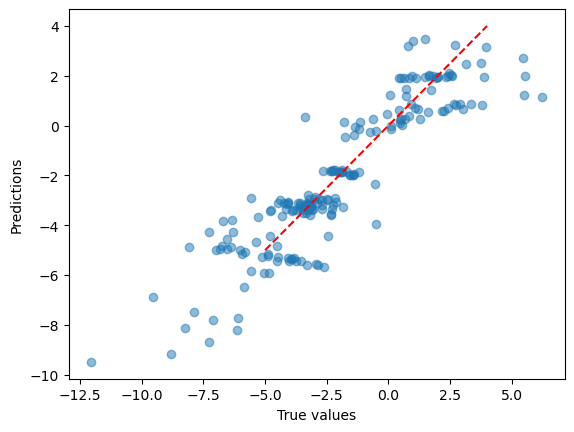

In [17]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(range(-5, 5), range(-5, 5), "r--")
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.show()
# 这个代码会创建一个散点图，显示模型的预测值与真实值之间的关系。
# x轴是真实值，y轴是预测值。如果模型预测完全准确，则所有点都将落在红色虚线上方，红色虚线表示完美预测的情况

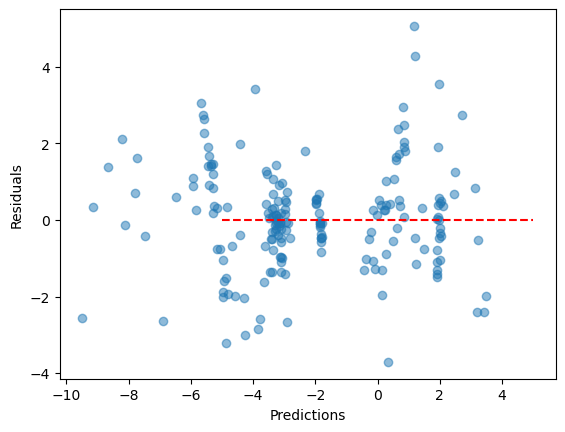

In [18]:
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.hlines(y=0, xmin=-5, xmax=5, colors='r', linestyles='--')
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()
# 这个代码将创建一个散点图，表示预测值和残差之间的关系。
# x轴是预测值，y轴是残差。如果模型的预测值能够准确地预测目标变量，残差应该随机分布在0附近。

In [19]:
def tSR_default(r_thresh):
    import numpy as np
    X = data_rfe.values[:, :-1]
    y = data_rfe.values[:, -1]
    for i in range(0,(data_rfe.shape[1]-1)):
         for j in range(0,(data_rfe.shape[1]-1)):
              for k in range(0,(data_rfe.shape[1]-1)):
                    for n in range(0,(data_rfe.shape[1]-1)):
                         px=(X[:,i]-X[:,j])*(X[:,k]-X[:,n])
                         per=np.corrcoef(px, y)
                         if per[0,1]>r_thresh or per[0,1]< -1 * r_thresh:
                              print(per[0,1])
                              print(i,j,k,n)
                              print(data_rfe.columns.values.tolist()[i],data_rfe.columns.values.tolist()[j],data_rfe.columns.values.tolist()[k],data_rfe.columns.values.tolist()[n])
                              print('(',data_rfe.columns.values.tolist()[i],'-',data_rfe.columns.values.tolist()[j],')','*','(',data_rfe.columns.values.tolist()[k],'-',data_rfe.columns.values.tolist()[n],')')
                              print('**********************************************')
                              with open(path+"/data.txt", "a+") as f:
                                  f.write(str(per[0,1])+"\n")
                                  f.write(str(i)+" "+str(j)+" "+str(k)+" "+str(n)+"\n")
                                  f.write(str(data_rfe.columns.values.tolist()[i])+" "
                                          +str(data_rfe.columns.values.tolist()[j])+" "
                                          +str(data_rfe.columns.values.tolist()[k])+" "
                                          +str(data_rfe.columns.values.tolist()[n])+"\n")
                                  f.write("( "+str(data_rfe.columns.values.tolist()[i]) + " - "
                                          + str(data_rfe.columns.values.tolist()[j]) + " ) * ("
                                          + str(data_rfe.columns.values.tolist()[k]) + " - "
                                          + str(data_rfe.columns.values.tolist()[n]) + " )\n")
                                  f.write('**********************************************\n')

tSR_default(0.8)

C:\Users\DELL\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\DELL\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
def tSR_tan(r_thresh):
    import numpy as np
    X = data_rfe.values[:, :-1]
    y = data_rfe.values[:, -1]
    for i in range(0,(data_rfe.shape[1]-1)):
     for j in range(0,(data_rfe.shape[1]-1)):
      for k in range(0,(data_rfe.shape[1]-1)):
        for n in range(0,(data_rfe.shape[1]-1)):
         px=(X[:,i]-X[:,j])*(X[:,k]-X[:,n])
         per=np.corrcoef(px, y)
         if per[0,1]>r_thresh or per[0,1] < -1 * r_thresh:
          print(per[0,1])
          print(i,j,k,n)
          print(data.columns.values.tolist()[i],data.columns.values.tolist()[j],data.columns.values.tolist()[k],data.columns.values.tolist()[n])
          print('(',data.columns.values.tolist()[i],'-',data.columns.values.tolist()[j],')','*','(',data.columns.values.tolist()[k],'-',data.columns.values.tolist()[n],')')
          print('**********************************************')
tSR_tan(0.8)